In [156]:
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import seaborn as sn
import pandas as pd
from pathlib import Path
import numpy as np
plt.rcParams["figure.figsize"] = (20,10)
import scipy.stats as stats
import pickle
import timeit
SEED = 0
np.random.seed(SEED)
from sklearn.decomposition import PCA
from evaluate import get_mask, distance, add_noise, get_sparsity, add_saltpepper, normalize_matrix, evaluate_model, get_random_samples

In [105]:
out_path = Path("/data/toulouse/bicycle/notebooks/experiments/masking/data")
data_path = Path("/data/toulouse/bicycle/notebooks/experiments/masking/data/")


In [138]:
parameter_set = dict()
exclude_params = ["params1", "params4", "params8", "params7", "params9"]
for file in (data_path/"parameters").iterdir():
    if file.name[:-7] not in exclude_params:
        with open(file, "rb") as rf:
            dic = pickle.load(rf)
            if dic.get("comment", False):
                parameter_set[file.name[:-7]] = dic
comments=[x["comment"] for x in parameter_set.values()]

In [139]:
out_path = Path("/data/toulouse/bicycle/notebooks/experiments/masking/data")
data_path = Path("/data/toulouse/bicycle/notebooks/experiments/masking/data/")
data_dict = dict()
for dir in (data_path/"scMultiSim_data").iterdir():
    if not (dir/"atac_counts.csv").exists():
        print(dir)
        continue
    atac_base = pd.read_csv(dir/"atac_counts.csv", index_col=0).to_numpy()
    grn = pd.read_csv(dir/"geff.csv", index_col=0).to_numpy()
    region_to_gene = pd.read_csv(dir/"region_to_gene.csv", index_col=0).to_numpy()
    region_to_tf = pd.read_csv(dir/"region_to_tf.csv", index_col=0).to_numpy()
    data_dict[str(dir.name)] = {
        "grn":grn,
        "atac":atac_base,
        "region_to_gene":region_to_gene,
        "region_to_tf": region_to_tf,
        }

/data/toulouse/bicycle/notebooks/experiments/masking/data/scMultiSim_data/run_02


In [159]:
# compare parameters with t-test
distances = np.empty((10, len(parameter_set.keys()), len(data_dict.keys())))
colors = [x for x in mc.CSS4_COLORS.items()]
for  dataset in range(0, 10):
    for p, (key, params) in enumerate(parameter_set.items()):
        for d, dic in enumerate(data_dict.values()):
            data = dic.copy()
            data["region_to_gene"] = add_saltpepper(data["region_to_gene"], p=dataset*0.1)
            data["region_to_tf"] = add_saltpepper(data["region_to_tf"], p=dataset*0.1)
            grn = data.pop("grn")
            mask = get_mask(**data,
                            **params,
                            )
            distances[dataset, p, d] = distance(grn, mask)


In [179]:
distances.shape

(10, 3, 7)

(10, 7)
(10, 7)
(10, 7)


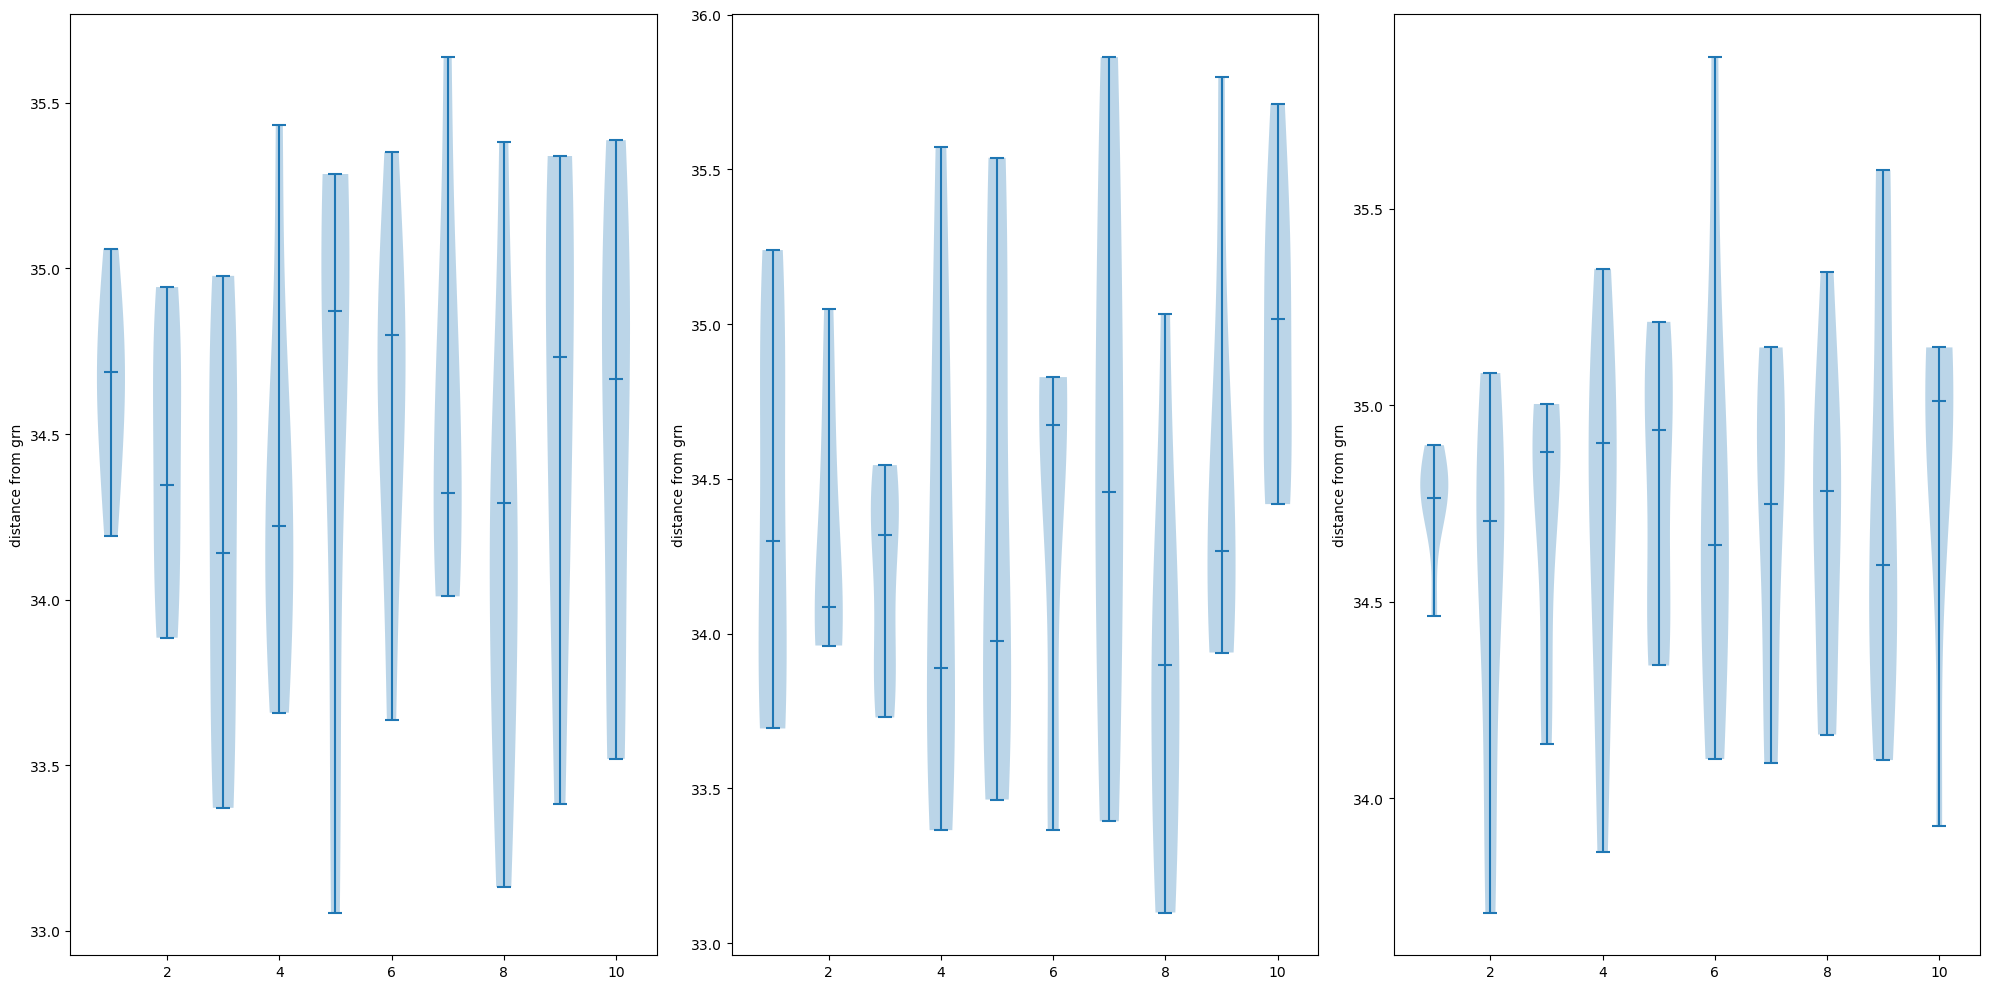

In [ ]:
distances = distances.swapaxes(0, 1)
fig, ax = plt.subplots(nrows=1, ncols=len(distances))
ax = ax.flatten()
for n, dataset in enumerate(distances):
    print(dataset.shape)
    ax[n].violinplot(dataset = dataset.T, showmedians=True)
    ax
    #ax[n].set_xticks(np.arange(1, distances.shape[2]+2), labels=comments)
    ax[n].set_ylabel("distance from grn")
fig.tight_layout()
plt.show()
distances = distances.swapaxes(0, 1)


Text(216.97222222222223, 0.5, 'Log distance from grn')

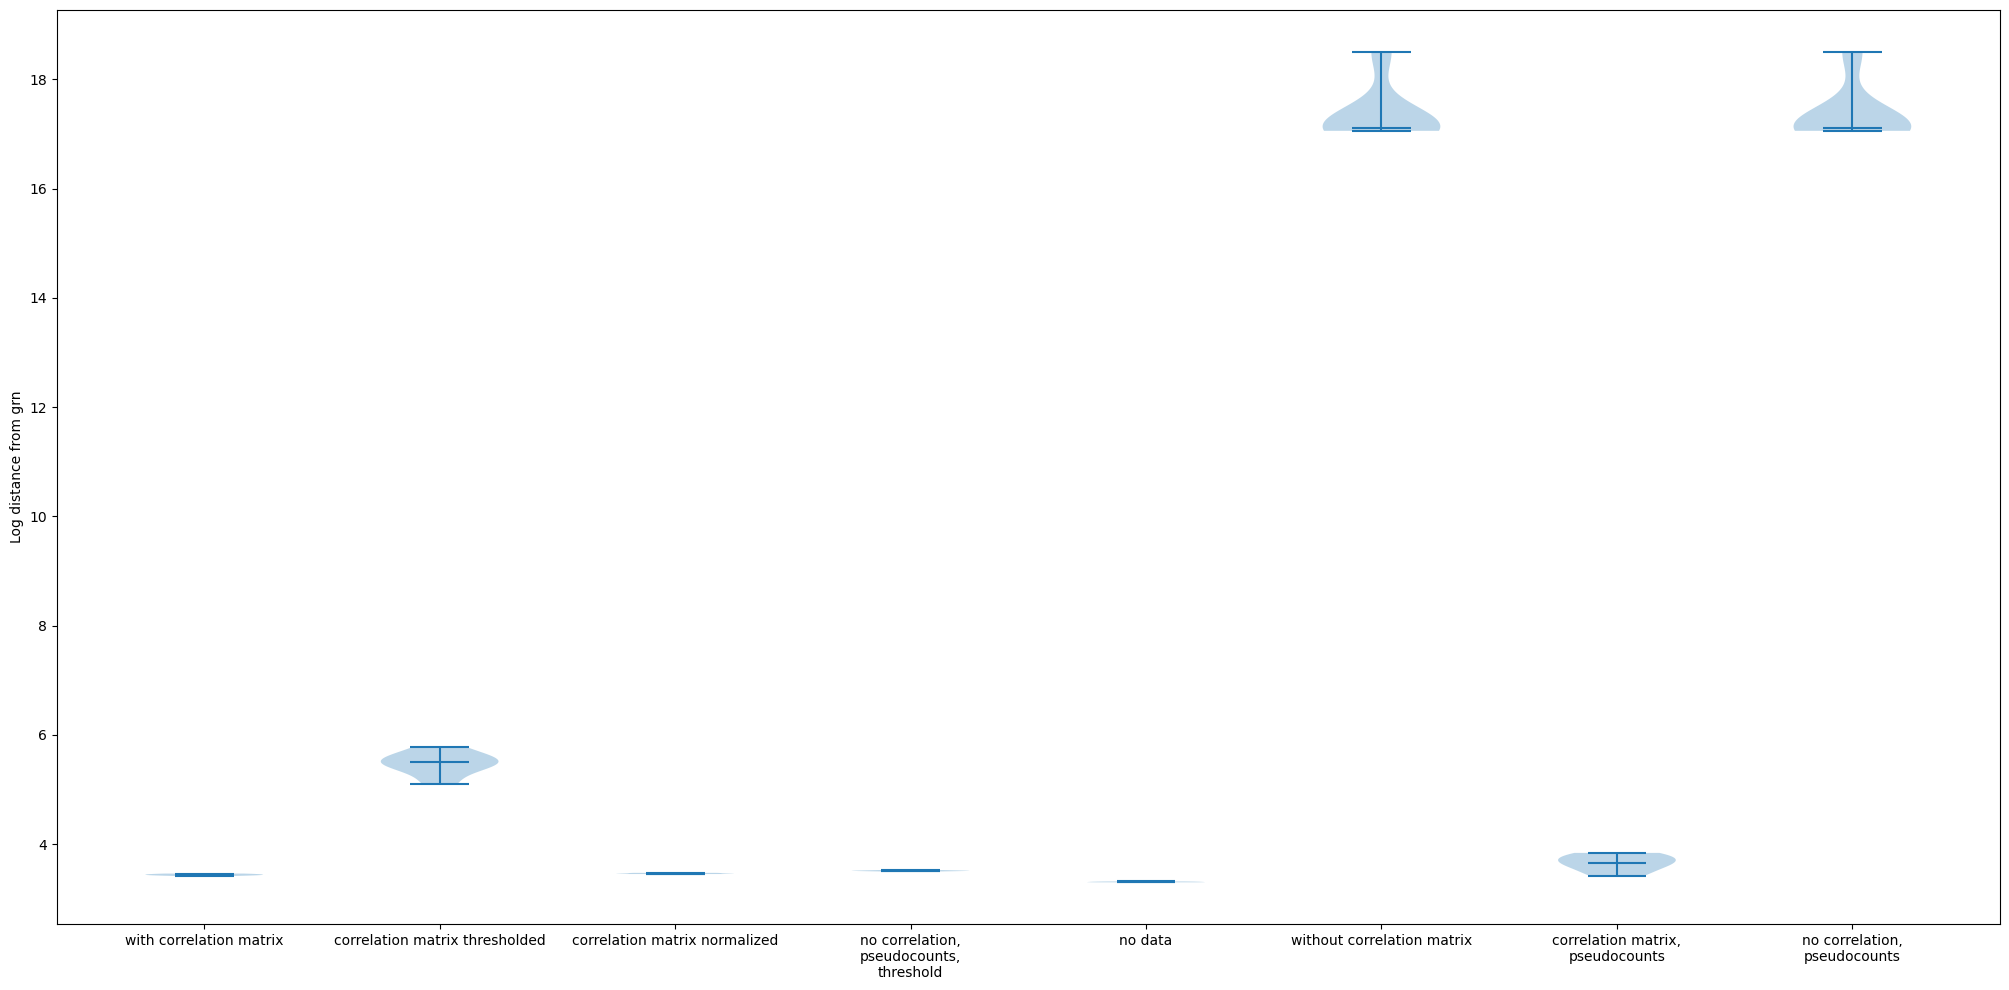

In [89]:
plt.violinplot(dataset = np.log(distances.T), showmedians=True)
plt.xticks(np.arange(1, distances.shape[1]+2), labels=comments)
plt.tight_layout()
plt.ylabel("Log distance from grn")

In [90]:
# add some noise
for key, data in data_dict.items():
    data_dict[key]["region_to_gene"] = add_saltpepper(data["region_to_gene"], p=0.2)
    data_dict[key]["region_to_tf"] = add_saltpepper(data["region_to_tf"], p=0.2)

np.array
np.array
np.array
np.array
np.array
np.array
np.array


Text(203.72222222222223, 0.5, 'Log distance from grn')

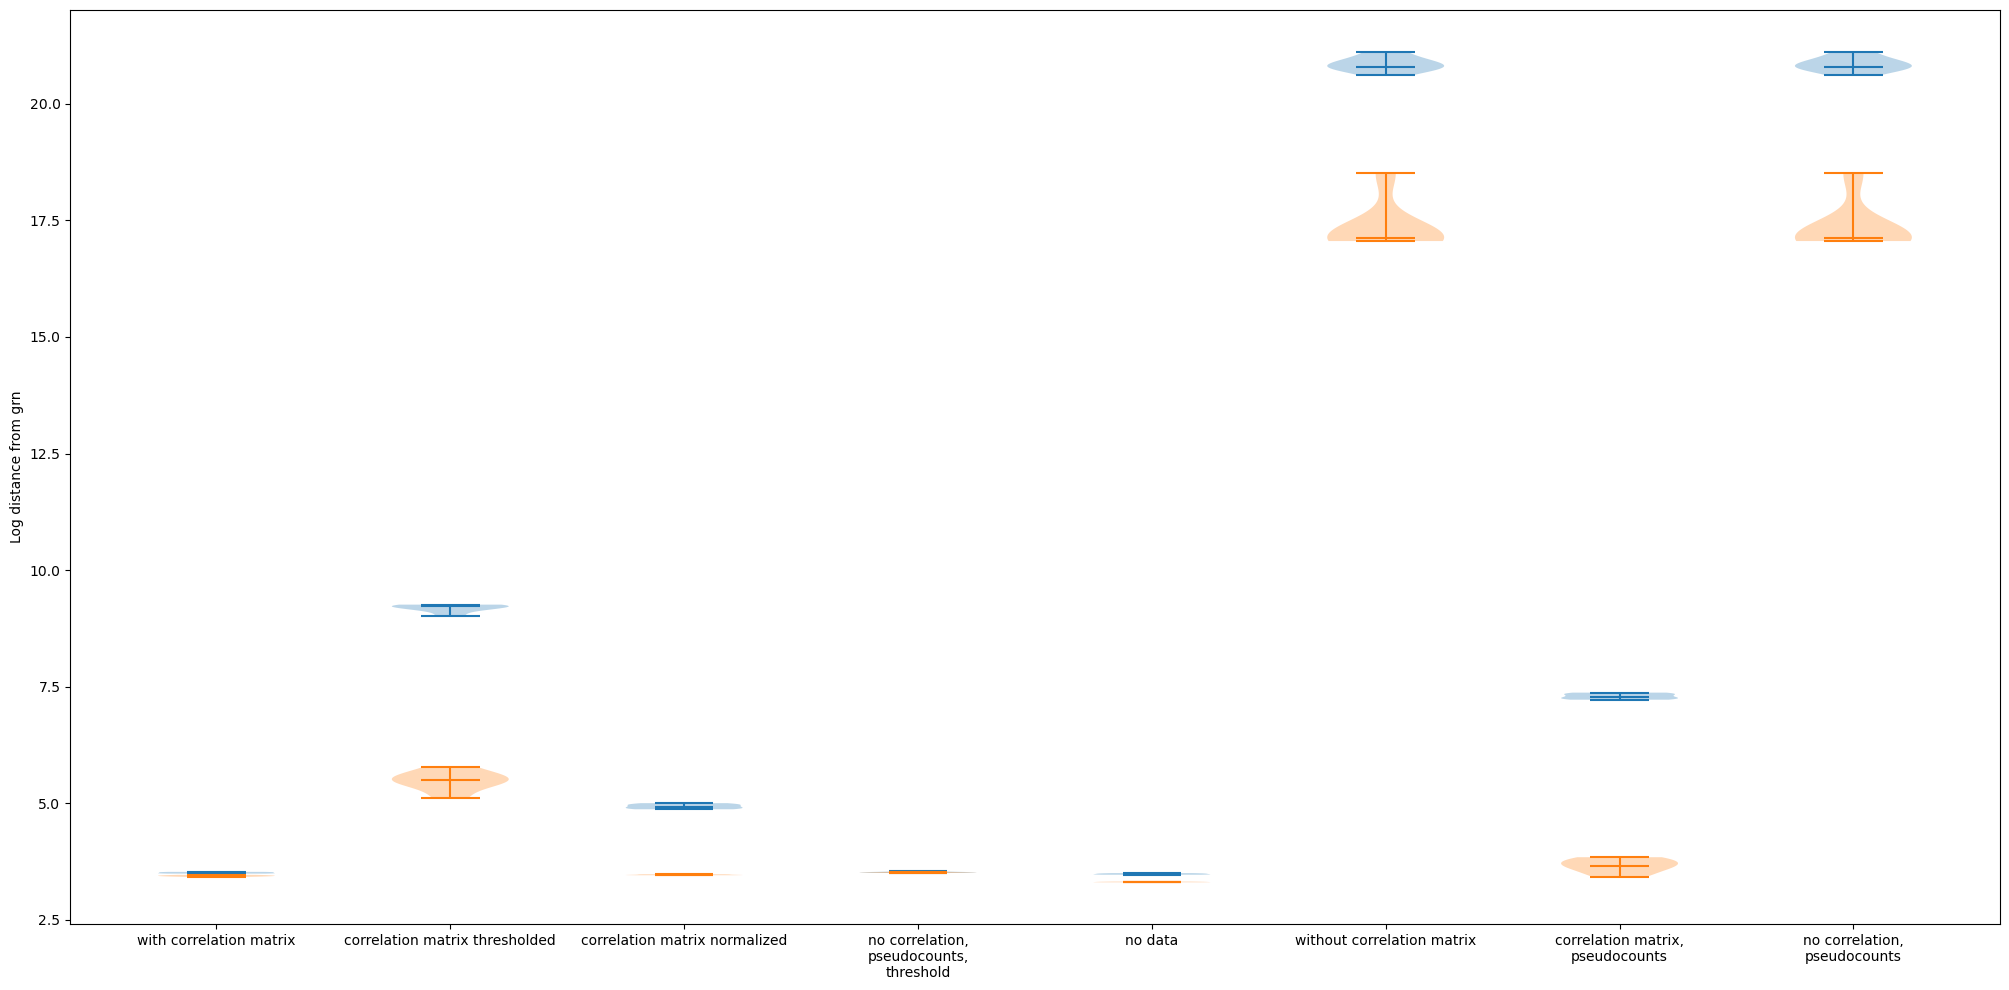

In [ ]:
# compare parameters with t-test
distances_noised = np.empty((len(parameter_set.keys()), len(data_dict.keys())))
for dataset, (key, params) in enumerate(parameter_set.items()):
    for d, dic in enumerate(data_dict.values()):
        data = dic.copy()
        grn = data.pop("grn")
        mask = get_mask(**data,
                        **params,
                        )
        distances_noised[dataset, d] = distance(grn, mask)

plt.violinplot(dataset = np.log(distances_noised.T), showmedians=True)
plt.violinplot(dataset = np.log(distances.T), showmedians=True)
plt.xticks(np.arange(1, distances_noised.shape[1]+2), labels=comments)
plt.tight_layout()
plt.ylabel("Log distance from grn")